In [1]:
from datetime import date

import pandas as pd
import matplotlib.pyplot as plt

# downloaod csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_positive_cases_by_municipality.csv
data = pd.read_csv('data/130001_tokyo_covid19_positive_cases_by_municipality.csv', parse_dates = ['公表_年月日', ], low_memory=False)
# new_positive = data[data['市区町村名'].str.contains('文京区', na=False)]['陽性者数'].diff()
# new_positive.describe()
data[-1:]


,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
32895,NaN,NaN,NaN,2021-08-26,調査中,213


In [2]:
data['集計区分'].unique()

array(['市区町村', '都外', '調査中'], dtype=object)

In [3]:
# ref. `第１表` https://www.toukei.metro.tokyo.lg.jp/juukiy/2021/jy21000001.htm

population_dict = {
    '千代田区': 37787,
    '中央区': 95812,
    '港区': 146527,
    '新宿区': 219464,
    '文京区': 123472,
    '台東区': 123068,
    '墨田区': 155354,
    '江東区': 274831,
    '品川区': 228061,
    '目黒区': 158367,
    '大田区': 398687,
    '世田谷区': 490342,
    '渋谷区': 140170,
    '中野区': 207425,
    '杉並区': 325403,
    '豊島区': 178637,
    '北区': 199016,
    '荒川区': 117153,
    '板橋区': 315872,
    '練馬区': 380495,
    '足立区': 357044,
    '葛飾区': 238563,
    '江戸川区': 346934,
    '八王子市': 561828,
    '立川市': 184577,
    '武蔵野市': 147643,
    '三鷹市': 190126,
    '青梅市': 132145,
    '府中市': 260255,
    '昭島市': 113552,
    '調布市': 237815,
    '町田市': 429152,
    '小金井市': 123828,
    '小平市': 195543,
    '日野市': 187027,
    '東村山市': 151575,
    '国分寺市': 126862,
    '国立市': 76371,
    '福生市': 57024,
    '狛江市': 83268,
    '東大和市': 85317,
    '清瀬市': 74905,
    '東久留米市': 117007,
    '武蔵村山市': 72023,
    '多摩市': 148479,
    '稲城市': 92262,
    '羽村市': 54725,
    'あきる野市': 80221,
    '西東京市': 206047,
    '瑞穂町': 32568,
    '日の出町': 16588,
    '檜原村': 2112,
    '奥多摩町': 4991,
    '大島町': 7411,
    '利島村': 310,
    '新島村': 2633,
    '神津島村': 1887,
    '三宅村': 2383,
    '御蔵島村': 307,
    '八丈町': 7224,
    '青ヶ島村': 165,
    '小笠原村': 2606,
}

In [4]:
data = data[(data['公表_年月日'] >= date(date.today().year - 1, date.today().month, date.today().day).strftime('%Y-%m-%d')) & (data['公表_年月日'] < date.today().strftime('%Y-%m-%d'))]
# data = data[data['市区町村名'].str.contains('区', na=False)]

data = data.dropna()
data

,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,集計区分,陽性者数
9600,131016.0,東京都,千代田区,2020-08-28,市区町村,122
9601,131024.0,東京都,中央区,2020-08-28,市区町村,383
9602,131032.0,東京都,港区,2020-08-28,市区町村,992
9603,131041.0,東京都,新宿区,2020-08-28,市区町村,2499
9604,131059.0,東京都,文京区,2020-08-28,市区町村,377
...,...,...,...,...,...,...
32889,133817.0,東京都,三宅村,2021-08-26,市区町村,11
32890,133825.0,東京都,御蔵島村,2021-08-26,市区町村,2
32891,134015.0,東京都,八丈町,2021-08-26,市区町村,14
32892,134023.0,東京都,青ヶ島村,2021-08-26,市区町村,0


In [5]:

daily_count = pd.crosstab(data['公表_年月日'], data['市区町村名'], data['陽性者数'], aggfunc=lambda x: x, dropna=False, margins=False)
daily_count = daily_count.reindex(columns=population_dict.keys())
daily_diff = daily_count.diff()

daily_diff_rate = daily_diff.div(population_dict.values(), axis='columns').mul(100)


daily_diff_rate

市区町村名,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,...,奥多摩町,大島町,利島村,新島村,神津島村,三宅村,御蔵島村,八丈町,青ヶ島村,小笠原村
公表_年月日,,,,,,,,,,,,,,,,,,,,,
2020-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-29,0.000000,0.002087,0.013649,0.005012,0.003240,0.002438,0.005150,0.004730,0.003508,0.007577,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2020-08-30,0.000000,0.004175,0.001365,0.006835,0.000810,0.008126,0.001931,0.003639,0.000000,0.002526,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2020-08-31,0.002646,0.000000,0.002730,0.005468,0.000000,0.000000,0.005150,0.001455,0.000438,0.002526,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2020-09-01,0.010586,0.005219,0.002047,0.003645,0.000810,0.004063,0.001931,0.001455,0.001315,0.004420,...,0.000000,0.040480,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-22,0.044989,0.049054,0.060740,0.062880,0.045354,0.040628,0.064369,0.054215,0.048233,0.065670,...,0.080144,0.013493,0.000000,0.075959,0.0,0.0,0.0,0.000000,0.0,0.0
2021-08-23,0.029111,0.046967,0.032076,0.048299,0.024297,0.016251,0.027679,0.025106,0.042094,0.031572,...,0.000000,0.000000,0.000000,0.151918,0.0,0.0,0.0,0.013843,0.0,0.0
2021-08-24,0.058221,0.080366,0.041631,0.073816,0.032396,0.056879,0.042484,0.050940,0.049548,0.071985,...,0.000000,0.026987,0.000000,0.000000,0.0,0.0,0.0,0.013843,0.0,0.0


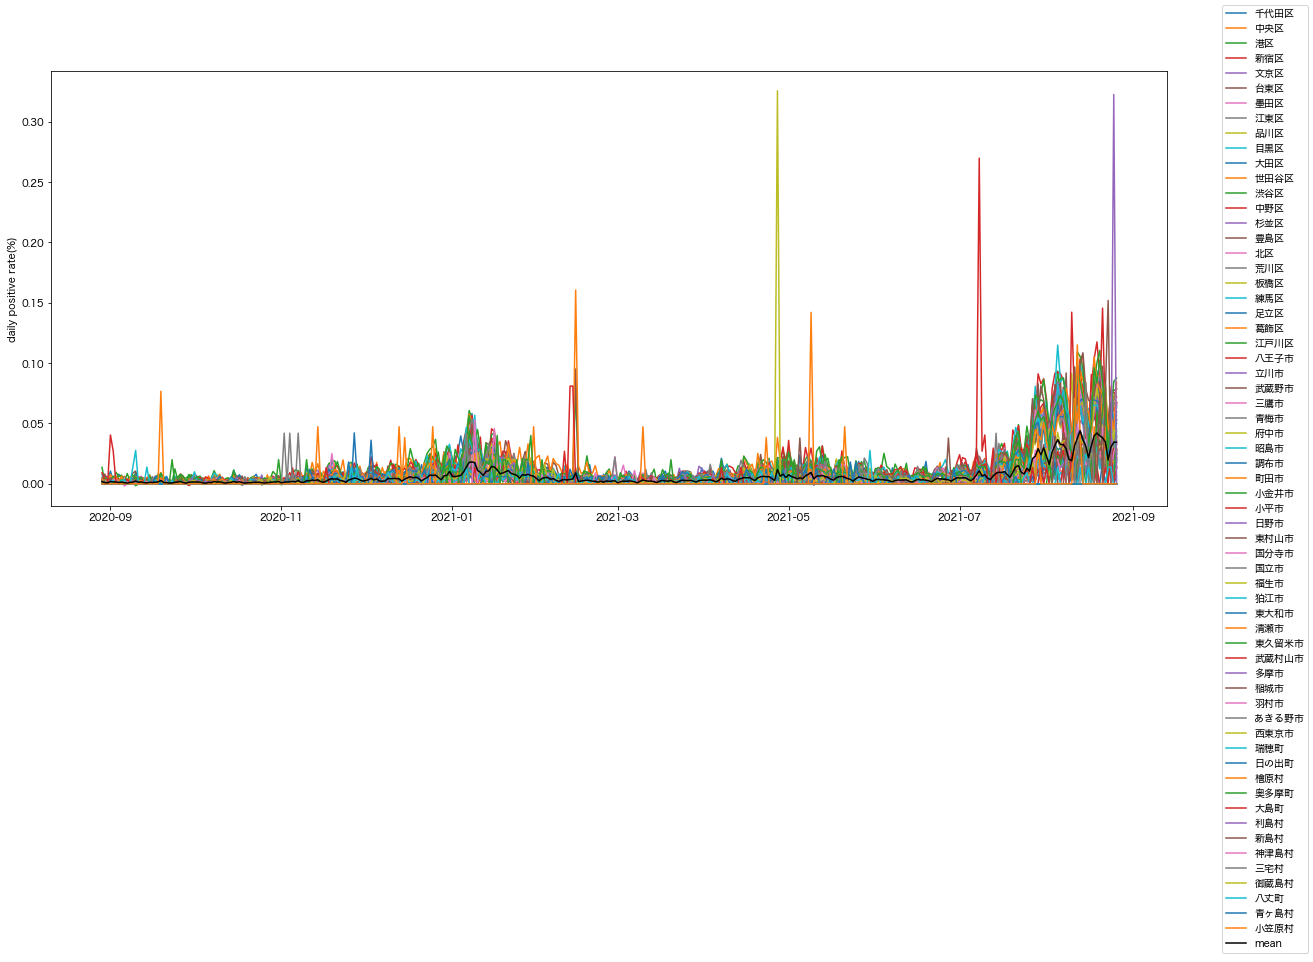

In [6]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

ax1.plot(daily_diff_rate, label=daily_diff_rate.columns)

ax1.plot(daily_diff_rate.mean(axis='columns'), color='k', label='mean')

ax1.set_ylabel('daily positive rate(%)')

fig.legend()


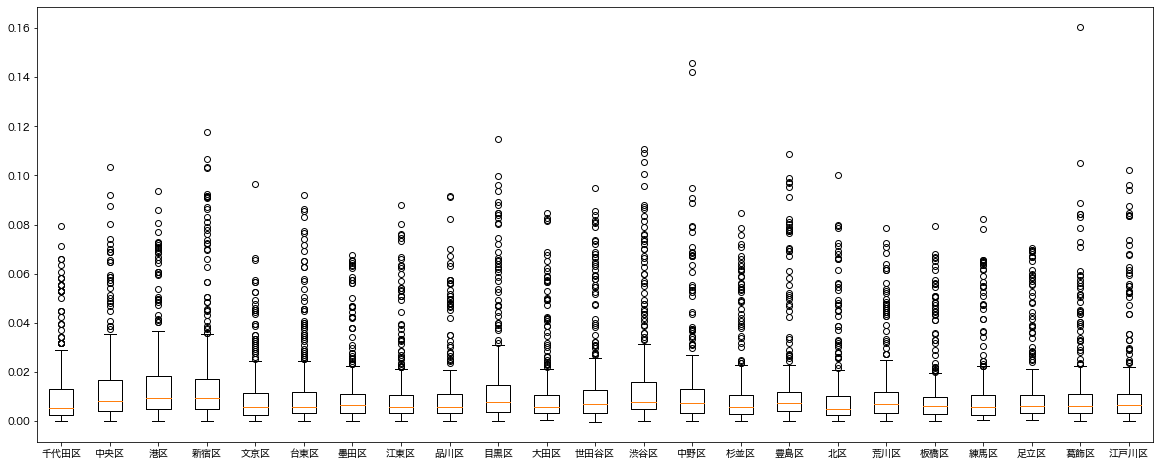

In [7]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

plot_df = daily_diff_rate.loc[:, daily_diff.columns.str.endswith('区', na=False)].dropna()
_ = ax1.boxplot(plot_df, vert=True, labels=plot_df.columns)



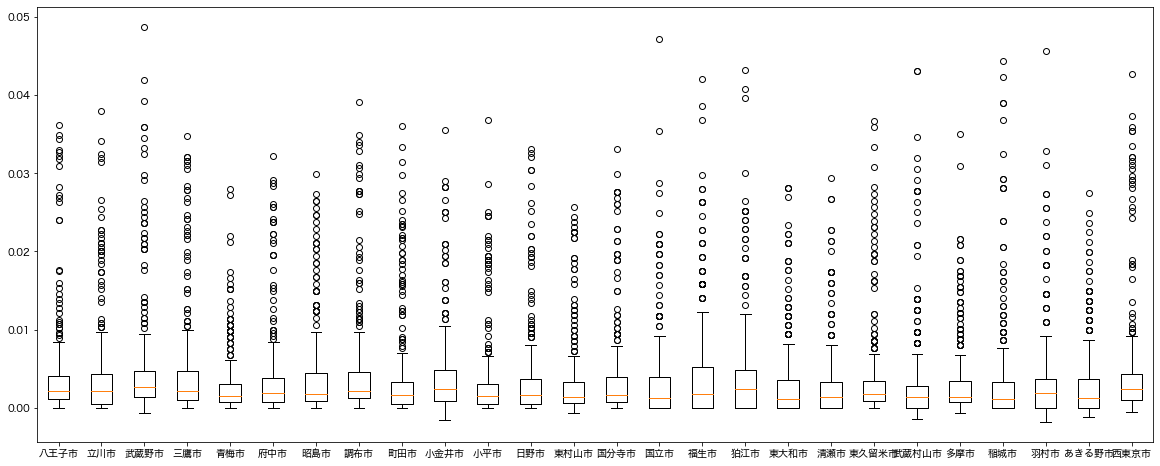

In [8]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

plot_df = daily_diff_rate.loc[:, daily_diff.columns.str.endswith('市', na=False)].dropna()
_ = ax1.boxplot(plot_df, vert=True, labels=plot_df.columns)

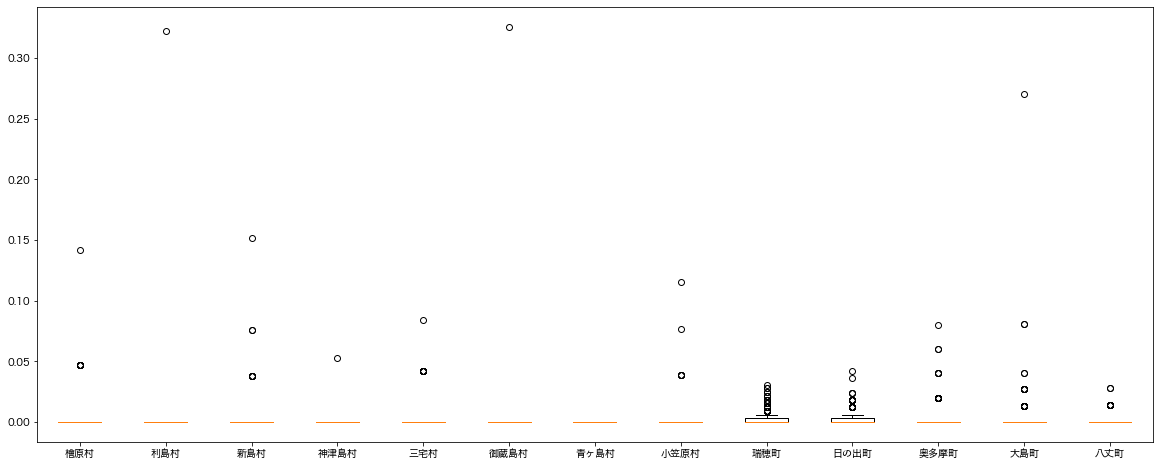

In [9]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.subplots()

plot_df = pd.concat([daily_diff_rate.loc[:, daily_diff.columns.str.endswith('村', na=False)].dropna(),
                     daily_diff_rate.loc[:, daily_diff.columns.str.endswith('町', na=False)].dropna()], axis='columns')
_ = ax1.boxplot(plot_df, vert=True, labels=plot_df.columns)

In [10]:
# 0.1%以上だった区を含んだ行のみに絞り込む
condition = '> 0.1'
query = '|'.join([f'{key} {condition}' for key in population_dict.keys()])

daily_diff_rate.query(query)

市区町村名,千代田区,中央区,港区,新宿区,文京区,台東区,墨田区,江東区,品川区,目黒区,...,奥多摩町,大島町,利島村,新島村,神津島村,三宅村,御蔵島村,八丈町,青ヶ島村,小笠原村
公表_年月日,,,,,,,,,,,,,,,,,,,,,
2021-02-14,0.005293,0.006262,0.006825,0.005468,0.008099,0.012188,0.005793,0.003639,0.002192,0.008840,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2021-04-27,0.021171,0.015656,0.021839,0.016859,0.009719,0.009751,0.010943,0.010552,0.010524,0.015786,...,0.020036,0.000000,0.000000,0.000000,0.0,0.000000,0.325733,0.000000,0.0,0.000000
2021-05-09,0.010586,0.018787,0.017744,0.029618,0.014578,0.013814,0.010943,0.012007,0.007454,0.018312,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2021-07-08,0.002646,0.017743,0.015697,0.022783,0.009719,0.017876,0.014805,0.022559,0.015785,0.010735,...,0.000000,0.269869,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2021-08-05,0.063514,0.064710,0.093498,0.092498,0.065602,0.057692,0.058576,0.080049,0.056125,0.114923,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.013843,0.0,0.000000
2021-08-10,0.015878,0.040705,0.032076,0.040553,0.024297,0.008126,0.012230,0.017465,0.091642,0.044201,...,0.000000,0.026987,0.000000,0.000000,0.0,0.041964,0.000000,0.000000,0.0,0.000000
2021-08-12,0.071453,0.087672,0.077119,0.072449,0.033206,0.077193,0.063725,0.074591,0.055687,0.082719,...,0.020036,0.000000,0.000000,0.000000,0.0,0.041964,0.000000,0.000000,0.0,0.115119
2021-08-13,0.066160,0.103327,0.085991,0.102978,0.052644,0.062567,0.065657,0.075683,0.091204,0.099768,...,0.020036,0.000000,0.000000,0.037979,0.0,0.000000,0.000000,0.013843,0.0,0.038373
2021-08-14,0.052928,0.054273,0.080531,0.106623,0.049404,0.065005,0.057289,0.076047,0.063141,0.089034,...,0.020036,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
